In [1]:
import os

import numpy as np
import pandas as pd
import networkx as nx
from scipy.spatial.distance import cdist
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
# data_path = '../data/'
data_path = '/home/vast/MC1/data/'
template = data_path + 'CGCS-Template.csv'
G1_cand = data_path + 'Q1-Graph1.csv'
G2_cand = data_path + 'Q1-Graph2.csv'
G3_cand = data_path + 'Q1-Graph3.csv'
G4_cand = data_path + 'Q1-Graph4.csv'
G5_cand = data_path + 'Q1-Graph5.csv'

In [3]:
def path_to_graph(path, edge_type=[0]):
    df = pd.read_csv(path, usecols=[0,1,2])
    df = df[df['eType'].isin(edge_type)]
    
    G = nx.from_pandas_edgelist(df, 'Source', 'Target', create_using=nx.DiGraph)
    return G

In [4]:
GT = path_to_graph(template)
G1 = path_to_graph(G1_cand)
G2 = path_to_graph(G2_cand)
G3 = path_to_graph(G3_cand)
G4 = path_to_graph(G4_cand)
G5 = path_to_graph(G5_cand)

FileNotFoundError: [Errno 2] File /home/vast/MC1/data/CGCS-Template.csv does not exist: '/home/vast/MC1/data/CGCS-Template.csv'

In [5]:
def load_graphlet_freq(path, **kwargs):
    df = pd.read_csv(path, index_col='Vertex', **kwargs)
    return df

In [6]:
freq_data_path = '../gtrieScanner/data/frequencies/'
template_freq = freq_data_path + 'template-0-undir5.csv'
G1_freq = freq_data_path + 'Q1-Graph1-0-undir5.csv'
G2_freq = freq_data_path + 'Q1-Graph2-0-undir5.csv'
G3_freq = freq_data_path + 'Q1-Graph3-0-undir5.csv'
G4_freq = freq_data_path + 'Q1-Graph4-0-undir5.csv'
G5_freq = freq_data_path + 'Q1-Graph5-0-undir5.csv'

In [7]:
template_0_undir5 = load_graphlet_freq(template_freq)
G1_0_undir5 = load_graphlet_freq(G1_freq)
G2_0_undir5 = load_graphlet_freq(G2_freq)
G3_0_undir5 = load_graphlet_freq(G3_freq)
G4_0_undir5 = load_graphlet_freq(G4_freq)
G5_0_undir5 = load_graphlet_freq(G5_freq)

In [20]:
template_0_undir5

0111110111110101110011000  0110010011100100110001000  \
Vertex                                                         
41                           72.0                        0.0   
45                           55.0                        5.0   
47                           54.0                        8.0   
57                           50.0                        8.0   
65                            1.0                        0.0   
0                             0.0                        0.0   
40                            1.0                        0.0   
67                            0.0                        3.0   
43                           53.0                        3.0   
56                           54.0                        6.0   
39                           13.0                        3.0   
66                            0.0                        0.0   
27                           50.0                        2.0   
34                           63.0                        0.0   
58                           53.0                        2.0   
63                           57.0                        0.0   
37                           64.0                        0.0   
graph                       128.0                        8.0   

        0110010010100010100000100  0111010110110011100100110  \
Vertex                                                         
41                            0.0                        0.0   
45                           10.0                        2.0   
47                           66.0                        2.0   
57                           30.0                        2.0   
65                           18.0                        0.0   
0                            12.0                        0.0   
40                           18.0                        0.0   
67                            8.0                        0.0   
43                           10.0                        1.0   
56                           14.0                        2.0   
39                           56.0                        0.0   
66                           12.0                        0.0   
27                           20.0                        0.0   
34                           22.0                        0.0   
58                           11.0                        1.0   
63                           12.0                        0.0   
37                           11.0                        0.0   
graph                        66.0                        2.0   

        0111110110110101110010000  0110010011100000100001000  \
Vertex                                                         
41                          230.0                       55.0   
45                           61.0                       26.0   
47                           85.0                       40.0   
57                           84.0                        6.0   
65                           71.0                       14.0   
0                            60.0                       26.0   
40                           71.0                       14.0   
67                           23.0                       43.0   
43                           75.0                       17.0   
56                           67.0                       22.0   
39                           59.0                       75.0   
66                            1.0                       47.0   
27                           45.0                       17.0   
34                           67.0                       16.0   
58                          102.0                       15.0   
63                          113.0                        7.0   
37                          121.0                        5.0   
graph                       267.0                       89.0   

        0111010101110001000101010  0111110100110001000110010  \
Vertex                                                         
41                            0.0    

In [21]:
template_0_undir5.apply(np.log)

0111110111110101110011000  0110010011100100110001000  \
Vertex                                                         
41                       4.276666                       -inf   
45                       4.007333                   1.609438   
47                       3.988984                   2.079442   
57                       3.912023                   2.079442   
65                       0.000000                       -inf   
0                            -inf                       -inf   
40                       0.000000                       -inf   
67                           -inf                   1.098612   
43                       3.970292                   1.098612   
56                       3.988984                   1.791759   
39                       2.564949                   1.098612   
66                           -inf                       -inf   
27                       3.912023                   0.693147   
34                       4.143135                       -inf   
58                       3.970292                   0.693147   
63                       4.043051                       -inf   
37                       4.158883                       -inf   
graph                    4.852030                   2.079442   

        0110010010100010100000100  0111010110110011100100110  \
Vertex                                                         
41                           -inf                       -inf   
45                       2.302585                   0.693147   
47                       4.189655                   0.693147   
57                       3.401197                   0.693147   
65                       2.890372                       -inf   
0                        2.484907                       -inf   
40                       2.890372                       -inf   
67                       2.079442                       -inf   
43                       2.302585                   0.000000   
56                       2.639057                   0.693147   
39                       4.025352                       -inf   
66                       2.484907                       -inf   
27                       2.995732                       -inf   
34                       3.091042                       -inf   
58                       2.397895                   0.000000   
63                       2.484907                       -inf   
37                       2.397895                       -inf   
graph                    4.189655                   0.693147   

        0111110110110101110010000  0110010011100000100001000  \
Vertex                                                         
41                       5.438079                   4.007333   
45                       4.110874                   3.258097   
47                       4.442651                   3.688879   
57                       4.430817                   1.791759   
65                       4.262680                   2.639057   
0                        4.094345                   3.258097   
40                       4.262680                   2.639057   
67                       3.135494                   3.761200   
43                       4.317488                   2.833213   
56                       4.204693                   3.091042   
39                       4.077537                   4.317488   
66                       0.000000                   3.850148   
27                       3.806662                   2.833213   
34                       4.204693                   2.772589   
58                       4.624973                   2.708050   
63                       4.727388                   1.945910   
37                       4.795791                   1.609438   
graph                    5.587249                   4.488636   

        0111010101110001000101010  0111110100110001000110010  \
Vertex                                                         
41                           -inf    

In [8]:
template_freq = freq_data_path + 'template-0-dir4.csv'
G1_freq = freq_data_path + 'Q1-Graph1-0-dir4.csv'
G2_freq = freq_data_path + 'Q1-Graph2-0-dir4.csv'
G3_freq = freq_data_path + 'Q1-Graph3-0-dir4.csv'
G4_freq = freq_data_path + 'Q1-Graph4-0-dir4.csv'
G5_freq = freq_data_path + 'Q1-Graph5-0-dir4.csv'

In [9]:
template_0_dir4 = load_graphlet_freq(template_freq)
G1_0_dir4 = load_graphlet_freq(G1_freq)
G2_0_dir4 = load_graphlet_freq(G2_freq)
G3_0_dir4 = load_graphlet_freq(G3_freq)
G4_0_dir4 = load_graphlet_freq(G4_freq)
G5_0_dir4 = load_graphlet_freq(G5_freq)

In [5]:
def distance_matrix(df1, df2, return_indexes=False):
    columns_df1 = df1.columns
    columns_df2 = df2.columns
    for graphlet in columns_df1:
        if graphlet not in columns_df2:
            df2[graphlet] = 0
    for graphlet in columns_df2:
        if graphlet not in columns_df1:
            df1[graphlet] = 0
    
    mat = cdist(df1, df2, 'cosine')
    
    if return_indexes:
        return mat, df1.index, df2.index
    return mat

In [10]:
def compute_distance_matching(freqs_template, freqs_candidate, name=None):
    dist_mat, node_g1, node_g2 = distance_matrix(freqs_template, freqs_candidate, True)
    sparse_mat = csr_matrix(dist_mat)
    bipartite = nx.bipartite.from_biadjacency_matrix(sparse_mat)
    
    relabeling = {}
    for i, n in enumerate(node_g1):
        relabeling[i] = n
        
    for j, n in enumerate(node_g2):
        relabeling[j + len(node_g1)] = n
    
    bipartite = nx.relabel_nodes(bipartite, relabeling)
    
    df = pd.DataFrame(columns=['template', 'candidate', 'cosine_distance', 'match'])
    
    try:
        matching = nx.algorithms.bipartite.matching.minimum_weight_full_matching(bipartite)
    except Exception as e:
        matching = {}
    
    # Order matching and save it in a dataframe
    matching2 = {}
    for a,b in matching.items():
        if int(b) < int(a):
            matching2[b] = a
        else:
            matching2[a] = b

    matching_df = pd.DataFrame({'templateID': list(matching2.keys()), 'candidateID': list(matching2.values())})

    matching_path = 'matchings/graphlets/' + name + '.csv' 
    matching_df.to_csv(matching_path, index=False)    
    
    i = 0
    for template_node in node_g1:
        for candidate_node in bipartite[template_node]:
            if template_node in matching.keys():
                match = matching[template_node]
            else:
                match = None
            df.loc[i] = [template_node, candidate_node, bipartite.edges[template_node, candidate_node]['weight'], match]
            i += 1
            
#     df = df.astype({'template':'int32', 'candidate':'int', 'cosine_distance':'float', 'match':'Int64'})
    return df

In [13]:
def output_distances(graphlets='dir4', edge_type='0'):
    template_freq_path = freq_data_path + 'template-' + edge_type + '-' + graphlets + '.csv'
    template_freqs = load_graphlet_freq(template_freq_path)
    
    if 'graph' in template_freqs.index:
            template_freqs = template_freqs.drop('graph')
    
    for graph_n in [1, 2, 3, 4, 5]:
        print(graph_n)
        try:
            freq_path = freq_data_path + 'Q1-Graph' + str(graph_n) + '-' + edge_type + '-' + graphlets + '.csv'
            graph_freqs = load_graphlet_freq(freq_path)

            if 'graph' in graph_freqs.index:
                graph_freqs = graph_freqs.drop('graph')

            results_df = compute_distance_matching(template_freqs, graph_freqs, name=edge_type + '-' + graphlets + '_' + 'Q1-Graph' + str(graph_n))

            results_df.to_csv('graphlet_distances/' + 'graph' + str(graph_n) + '-' + edge_type + '-' + graphlets + '.csv', index=False)
        except Exception as e:
            print(e)

In [14]:
for graphlets in ['dir4', 'undir5']:
    print('graphlet : ', graphlets)
    for edge_type in ['0-1','2-3','0','1','2','3','4','5','6']:
        print('edge type : ', edge_type)
        output_distances(graphlets, edge_type)

graphlet :  dir4
edge type :  0-1
1
2


KeyboardInterrupt: 

# Graphlet freqs of extracted subgraphs

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [12]:
dir_path = 'extracted_graphs2/graphlets/'

In [13]:
def load_extracted_graphlet_freqs(path, graphlet_type, skipfooter=1, N=None):
    files = os.listdir(path)
    df_pop = []

    i = 0
    for f in files:
        if N != None and i == N:
            print(len(df_pop), ' graphs loaded') 
            return df_pop
        
        if f[-4:] == '.csv' and graphlet_type in f:
            df = load_graphlet_freq(path + f, skipfooter=skipfooter, dtype=np.int32)
            if 'graph' in df.index:
                df.drop('graph')

            df_pop.append(df)
    #         print(df)
            i += 1
    
    print(len(df_pop), ' graphs loaded') 
    return df_pop

In [14]:
df_pop = load_extracted_graphlet_freqs(dir_path, 'undir5')

/home/vast/miniconda3/envs/vast/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


4000  graphs loaded


In [15]:
df_pop[0].tail()

0110010011100110110001100  0111010110110011100000100  \
Vertex                                                         
631652                          1                          2   
492933                          0                          0   
487805                          0                          1   
542056                          0                          1   
554582                          0                          1   

        0111110110110001100010000  0111110100110001000010000  \
Vertex                                                         
631652                          2                         11   
492933                          0                          0   
487805                          2                          8   
542056                          0                          1   
554582                          0                          3   

        0111110100110001000110010  0111110111110001100011000  \
Vertex                                                         
631652                          0                          0   
492933                          0                          0   
487805                          0                          0   
542056                          0                          0   
554582                          0                          0   

        0111010101110001000001000  0111110110110011100010100  \
Vertex                                                         
631652                         16                          0   
492933                          0                          0   
487805                         12                          0   
542056                          7                          0   
554582                          6                          0   

        0111010110110011100100110  0111010100110001000100010  \
Vertex                                                         
631652                          0                         21   
492933                          0                          6   
487805                          0                         10   
542056                          0                         13   
554582                          0                         10   

        0110010011100000100001000  0111010101110001000101010  \
Vertex                                                         
631652                        199                          3   
492933                         57                          0   
487805                         95                          0   
542056                         50                          0   
554582                         86                          1   

        0110010010100010100000100  0111110000100001000010000  \
Vertex                                                         
631652                        189                         18   
492933                         69                          1   
487805                         81                         10   
542056                         82                          0   
554582                         83                          7   

        0110010010100010100100110  0110010011100100110001000  
Vertex                                                        
631652                          3                         38  
492933                          2                          2  
487805                          0                         10  
542056                          1                          6  
554582                          0                         16

In [16]:
all_graphlets = pd.concat(df_pop, axis=0)

In [17]:
all_graphlets.shape

(75648, 21)

In [18]:
all_graphlets.head()

0110010011100110110001100  0111010110110011100000100  \
Vertex                                                         
564950                        8.0                       48.0   
544123                        0.0                       13.0   
484285                        1.0                       16.0   
597250                        0.0                       31.0   
620012                        0.0                        3.0   

        0111110110110001100010000  0111110100110001000010000  \
Vertex                                                         
564950                       74.0                       99.0   
544123                       23.0                       33.0   
484285                       29.0                       58.0   
597250                       38.0                       45.0   
620012                        2.0                        2.0   

        0111110100110001000110010  0111110111110001100011000  \
Vertex                                                         
564950                       12.0                        5.0   
544123                        3.0                        3.0   
484285                        6.0                        1.0   
597250                        9.0                        4.0   
620012                        0.0                        0.0   

        0111010101110001000001000  0111110110110011100010100  \
Vertex                                                         
564950                      118.0                       23.0   
544123                       39.0                        9.0   
484285                       79.0                       12.0   
597250                       68.0                       12.0   
620012                       22.0                        0.0   

        0111010110110011100100110  0111010100110001000100010  ...  \
Vertex                                                        ...   
564950                        8.0                       99.0  ...   
544123                        0.0                       29.0  ...   
484285                        2.0                       51.0  ...   
597250                        2.0                       71.0  ...   
620012                        0.0                       12.0  ...   

        0111010101110001000101010  0110010010100010100000100  \
Vertex                                                         
564950                       35.0                      237.0   
544123                        3.0                       85.0   
484285                       14.0                      163.0   
597250                       14.0                      175.0   
620012                        1.0                      107.0   

        0111110000100001000010000  0110010010100010100100110  \
Vertex                                                         
564950                       66.0                        0.0   
544123                       24.0                        3.0   
484285                       27.0                        4.0   
597250                        9.0                        5.0   
620012                        0.0                        1.0   

        0110010011100100110001000  0111110111110101110011000  \
Vertex                                                         
564950                      121.0                        NaN   
544123                       13.0                        NaN   
484285                       31.0                        NaN   
597250                       22.0                        NaN   
620012                        8.0                        NaN   

        0111110110110101110010000  0111110110110011100110110  \
Vertex                                                         
564950                        NaN                        NaN   
544123                        NaN                        NaN   
484285                        NaN                        NaN   
597250                        NaN                        NaN 

In [19]:
all_graphlets = all_graphlets.fillna(0).astype(np.int32)

In [20]:
all_graphlets.head()

0110010011100110110001100  0111010110110011100000100  \
Vertex                                                         
564950                          8                         48   
544123                          0                         13   
484285                          1                         16   
597250                          0                         31   
620012                          0                          3   

        0111110110110001100010000  0111110100110001000010000  \
Vertex                                                         
564950                         74                         99   
544123                         23                         33   
484285                         29                         58   
597250                         38                         45   
620012                          2                          2   

        0111110100110001000110010  0111110111110001100011000  \
Vertex                                                         
564950                         12                          5   
544123                          3                          3   
484285                          6                          1   
597250                          9                          4   
620012                          0                          0   

        0111010101110001000001000  0111110110110011100010100  \
Vertex                                                         
564950                        118                         23   
544123                         39                          9   
484285                         79                         12   
597250                         68                         12   
620012                         22                          0   

        0111010110110011100100110  0111010100110001000100010  ...  \
Vertex                                                        ...   
564950                          8                         99  ...   
544123                          0                         29  ...   
484285                          2                         51  ...   
597250                          2                         71  ...   
620012                          0                         12  ...   

        0111010101110001000101010  0110010010100010100000100  \
Vertex                                                         
564950                         35                        237   
544123                          3                         85   
484285                         14                        163   
597250                         14                        175   
620012                          1                        107   

        0111110000100001000010000  0110010010100010100100110  \
Vertex                                                         
564950                         66                          0   
544123                         24                          3   
484285                         27                          4   
597250                          9                          5   
620012                          0                          1   

        0110010011100100110001000  0111110111110101110011000  \
Vertex                                                         
564950                        121                          0   
544123                         13                          0   
484285                         31                          0   
597250                         22                          0   
620012                          8                          0   

        0111110110110101110010000  0111110110110011100110110  \
Vertex                                                         
564950                          0                          0   
544123                          0                          0   
484285                          0                          0   
597250                          0                          0 

In [21]:
tfidf = TfidfTransformer(use_idf=True, sublinear_tf=True)

In [22]:
Y = tfidf.fit_transform(all_graphlets)

In [24]:
tfidf.idf_

array([2.59851287, 1.49314607, 1.53460049, 1.37261303, 1.91617838,
       2.35882286, 1.27070841, 2.00348118, 2.41614772, 1.1530409 ,
       1.04956311, 1.59296868, 1.00153457, 1.39533797, 1.64947449,
       1.25998768, 2.56154767, 2.19313493, 2.99970495, 3.43964082,
       4.88591568])

In [34]:
# Save tfidf model
import joblib
joblib.dump(tfidf, 'tfidf_0_undir5.pkl', compress=9)

['tfidf_0_undir5.pkl']

In [50]:
joblib.dump(np.array(all_graphlets.columns), 'tfidf_0_undir5_order.pkl', compress=9)

['tfidf_0_undir5_order.pkl']

In [27]:
import joblib
t = joblib.load('tfidf_0_undir5.pkl')

In [28]:
t

TfidfTransformer(sublinear_tf=True)

In [27]:
all_graphlets.iloc[0]

0110010011100110110001100      8
0111010110110011100000100     48
0111110110110001100010000     74
0111110100110001000010000     99
0111110100110001000110010     12
0111110111110001100011000      5
0111010101110001000001000    118
0111110110110011100010100     23
0111010110110011100100110      8
0111010100110001000100010     99
0110010011100000100001000    375
0111010101110001000101010     35
0110010010100010100000100    237
0111110000100001000010000     66
0110010010100010100100110      0
0110010011100100110001000    121
0111110111110101110011000      0
0111110110110101110010000      0
0111110110110011100110110      0
0111110111110111110011100      0
0111110111110111110111110      0
Name: 564950, dtype: int32

In [39]:
Y[2].toarray()

array([[0.11528264, 0.24990837, 0.29733566, 0.3081596 , 0.23733019,
        0.10464883, 0.30270151, 0.30975296, 0.1814919 , 0.25228503,
        0.2955449 , 0.25717881, 0.2707632 , 0.26592933, 0.1746259 ,
        0.2478562 , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

### Plot the IDF

In [39]:
def formate_idf(all_graphlets, tfidf, graphlet_type):
    df_idf = pd.DataFrame({'graphlets': all_graphlets.columns, 'idf': tfidf.idf_})
    df_idf['graphlet_url'] = [
    f"https://raw.githubusercontent.com/AlexisPister/graphlet_svg/6fce19bd72b1c6d2cbd5933ead7c489a80abd2c2/{graphlet_type}/{graphlet_mat}.svg"
    for graphlet_mat in df_idf['graphlets']]
    df_idf.index = df_idf['graphlets']
    
    return df_idf

In [28]:
# df_idf = pd.DataFrame({'graphlets': all_graphlets.columns, 'idf': tfidf.idf_})
# df_idf['graphlet_url'] = [
# f"https://raw.githubusercontent.com/AlexisPister/graphlet_svg/6fce19bd72b1c6d2cbd5933ead7c489a80abd2c2/undir5/{graphlet_mat}.svg"
# for graphlet_mat in df_idf['graphlets']]
# df_idf.index = df_idf['graphlets']
df_idf = formate_idf(all_graphlets, tfidf, 'undir5')

In [29]:
graphlet_order = df_idf['graphlets']
graphlet_order

graphlets
0110010011100110110001100    0110010011100110110001100
0111010110110011100000100    0111010110110011100000100
0111110110110001100010000    0111110110110001100010000
0111110100110001000010000    0111110100110001000010000
0111110100110001000110010    0111110100110001000110010
0111110111110001100011000    0111110111110001100011000
0111010101110001000001000    0111010101110001000001000
0111110110110011100010100    0111110110110011100010100
0111010110110011100100110    0111010110110011100100110
0111010100110001000100010    0111010100110001000100010
0110010011100000100001000    0110010011100000100001000
0111010101110001000101010    0111010101110001000101010
0110010010100010100000100    0110010010100010100000100
0111110000100001000010000    0111110000100001000010000
0110010010100010100100110    0110010010100010100100110
0110010011100100110001000    0110010011100100110001000
0111110111110101110011000    0111110111110101110011000
0111110110110101110010000    0111110110110101110010000


In [30]:
df_idf.head()

graphlets       idf  \
graphlets                                                        
0110010011100110110001100  0110010011100110110001100  2.598513   
0111010110110011100000100  0111010110110011100000100  1.493146   
0111110110110001100010000  0111110110110001100010000  1.534600   
0111110100110001000010000  0111110100110001000010000  1.372613   
0111110100110001000110010  0111110100110001000110010  1.916178   

                                                                graphlet_url  
graphlets                                                                     
0110010011100110110001100  https://raw.githubusercontent.com/AlexisPister...  
0111010110110011100000100  https://raw.githubusercontent.com/AlexisPister...  
0111110110110001100010000  https://raw.githubusercontent.com/AlexisPister...  
0111110100110001000010000  https://raw.githubusercontent.com/AlexisPister...  
0111110100110001000110010  https://raw.githubusercontent.com/AlexisPister...

In [83]:
def plot_extracted_graphlets(data, width=900, height=300, order=None, column_y='freqs', return_order=False, no_legend=False, color="#4682b4", pearson=None, name=None):
    if order == None:
        order = list(data.sort_values(column_y, ascending=True).index)

    graphlets_marks = alt.Chart(data).mark_image().encode(
        x=alt.X('graphlets', axis=None, sort=order),
    #                 x=alt.X('graphlets', axis=None, sort=alt.EncodingSortField(field="freqs", order='ascending')),
        url="graphlet_url"
    ).properties(
        width=width,
        height=100
    )


    if pearson != None:
        title = 'graph ' + str(name) + ' (Pearson coefficient : ' + str(pearson.round(3)) + ')'
    else:
        title = 'idf'
    
    chart = alt.Chart(data).mark_bar().encode(
        x=alt.X('graphlets', axis=None, sort=order),
    #                 x=alt.X('graphlets', sort='y', axis=None),
        y=column_y,
    ).properties(
        width=width,
        height=height,
        title=title
    )
    
    

    concat_chart = alt.vconcat(
            chart, graphlets_marks
    ).configure_concat(
            spacing=0
    ).configure_view(
            strokeOpacity=0
    ).configure_mark(
            color=color
    )
    
    if no_legend:
        chart = chart.configure_mark(color=color)
        display(chart)
    else:
        display(concat_chart)
    
    if return_order == True:
        return order

In [84]:
plot_extracted_graphlets(df_idf, column_y='idf')

alt.VConcatChart(...)

### Plot graphlet freqs after tf-idf transformation

In [98]:
def compare_candidates(tfidf, graphlet_order, edge_type, graphlet_type, no_legend=False, color="#4682b4", width=900, height=300):
    for graph_n in ['template', 'Q1-Graph1', 'Q1-Graph2', 'Q1-Graph3', 'Q1-Graph4', 'Q1-Graph5']:
        print(graph_n)
        freq_path = freq_data_path + graph_n + '-' + str(edge_type) + '-' + graphlet_type + '.csv'
        graph_freqs = load_graphlet_freq(freq_path)

        if 'graph' in graph_freqs.index:
            graph_freqs = graph_freqs.drop('graph')

        for graphlet in graphlet_order:
            if graphlet not in graph_freqs.columns:
                graph_freqs[graphlet] = 0

        graph_freqs = graph_freqs.reindex(graphlet_order, axis=1)

        freqs_tfidf = tfidf.transform(graph_freqs)

        graph_freqs[:] = freqs_tfidf.toarray()
        graph_freqs.loc['mean'] = graph_freqs.mean()


        df_plot = pd.DataFrame({'graphlets': graphlet_order, 'freq_norm': graph_freqs.loc['mean']})
        df_plot['graphlet_url'] = [
        f"https://raw.githubusercontent.com/AlexisPister/graphlet_svg/6fce19bd72b1c6d2cbd5933ead7c489a80abd2c2/{graphlet_type}/{graphlet_mat}.svg"
        for graphlet_mat in df_plot['graphlets']]
    #         df_plot.index = df_plot['graphlets']

    #         print(df_plot)

        if no_legend == False:
            if graph_n == 'Q1-Graph5':
                no_legend2 = False
            else:
                no_legend2 = True
        else:
            no_legend2 = True
                    
        if graph_n == 'template':
            df_template = df_plot
            pearson = df_template['freq_norm'].corr(df_plot['freq_norm'])
            order = plot_extracted_graphlets(df_plot, width=width, height=height, order=None, column_y='freq_norm', return_order=True, no_legend=no_legend2, color=color, pearson=pearson, name=graph_n)
        else:
#             print('Pearson coefficient :', df_template['freq_norm'].corr(df_plot['freq_norm']))
            pearson = df_template['freq_norm'].corr(df_plot['freq_norm'])
            plot_extracted_graphlets(df_plot, width=width, height=height, order=order, column_y='freq_norm', return_order=False, no_legend=no_legend2, color=color, pearson=pearson, name=graph_n)


In [86]:
compare_candidates(tfidf, graphlet_order, 0, 'undir5', no_legend=True, width=500, height=200)

template


alt.Chart(...)

Q1-Graph1


alt.Chart(...)

Q1-Graph2


alt.Chart(...)

Q1-Graph3


alt.Chart(...)

Q1-Graph4


alt.Chart(...)

Q1-Graph5


alt.VConcatChart(...)

## Dir-4

In [45]:
df_pop_0_dir4 = load_extracted_graphlet_freqs('extracted_graphs3/graphlets/', 'dir4', N=4000)

/home/vast/miniconda3/envs/vast/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


4000  graphs loaded


In [46]:
all_graphlets_0_dir4 = pd.concat(df_pop_0_dir4, axis=0) 
all_graphlets_0_dir4 = all_graphlets_0_dir4.fillna(0).astype(np.int32)

In [31]:
tfidf_0_dir4 = TfidfTransformer(use_idf=True, sublinear_tf=True)

In [32]:
Y = tfidf_0_dir4.fit_transform(all_graphlets_0_dir4)

In [33]:
joblib.dump(tfidf_0_dir4, 'tfidf_0_dir4.pkl', compress=0)

['tfidf_0_dir4.pkl']

In [47]:
joblib.dump(np.array(all_graphlets_0_dir4.columns), 'tfidf_0_dir4_order.pkl', compress=0)

['tfidf_0_dir4_order.pkl']

In [41]:
df_idf_0_dir4 = formate_idf(all_graphlets_0_dir4, tfidf_0_dir4, 'dir4')

In [42]:
plot_extracted_graphlets(df_idf_0_dir4, column_y='idf', no_legend=True)

alt.Chart(...)

In [99]:
compare_candidates(tfidf_0_dir4, df_idf_0_dir4['graphlets'], 0, 'dir4', no_legend=True, width=500, height=200)

template


alt.Chart(...)

Q1-Graph1


alt.Chart(...)

Q1-Graph2


alt.Chart(...)

Q1-Graph3


alt.Chart(...)

Q1-Graph4


alt.Chart(...)

Q1-Graph5


alt.Chart(...)

## Phone channel (ET 1)

### Undir 5

In [48]:
df_pop_1_undir5 = load_extracted_graphlet_freqs('extracted_graphs3/edge_1/graphlets/', 'undir5', N=4000)

/home/vast/miniconda3/envs/vast/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


4000  graphs loaded


In [49]:
all_graphlets_1_undir5 = pd.concat(df_pop_1_undir5, axis=0) 
all_graphlets_1_undir5 = all_graphlets_1_undir5.fillna(0).astype(np.int32)

In [40]:
tfidf_1_undir5 = TfidfTransformer(use_idf=True, sublinear_tf=True)
Y = tfidf_1_undir5.fit_transform(all_graphlets_1_undir5)
df_idf_1_undir5 = formate_idf(all_graphlets_1_undir5, tfidf_1_undir5, 'undir5')

In [45]:
joblib.dump(tfidf_1_undir5, 'tfidf_1_undir5.pkl', compress=9)

['tfidf_1_undir5.pkl']

In [51]:
v

['tfidf_1_undir5_order.pkl']

In [47]:
plot_extracted_graphlets(df_idf_1_undir5, column_y='idf', color='orange')

alt.VConcatChart(...)

In [100]:
compare_candidates(tfidf_1_undir5, df_idf_1_undir5['graphlets'], 1, 'undir5', color='orange', width=500, height=200)

template


alt.Chart(...)

Q1-Graph1


alt.Chart(...)

Q1-Graph2


alt.Chart(...)

Q1-Graph3


alt.Chart(...)

Q1-Graph4


alt.Chart(...)

Q1-Graph5


alt.VConcatChart(...)

### Dir 4

In [52]:
df_pop_1_dir4 = load_extracted_graphlet_freqs('extracted_graphs3/edge_1/graphlets/', 'dir4', N=4000)

/home/vast/miniconda3/envs/vast/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


4000  graphs loaded


In [53]:
all_graphlets_1_dir4 = pd.concat(df_pop_1_dir4, axis=0) 
all_graphlets_1_dir4 = all_graphlets_1_dir4.fillna(0).astype(np.int32)

In [43]:
tfidf_1_dir4 = TfidfTransformer(use_idf=True, sublinear_tf=True)
Y = tfidf_1_dir4.fit_transform(all_graphlets_1_dir4)
df_idf_1_dir4 = formate_idf(all_graphlets_1_dir4, tfidf_1_dir4, 'dir4')

In [44]:
joblib.dump(tfidf_1_dir4, 'tfidf_1_dir4.pkl', compress=9)

['tfidf_1_dir4.pkl']

In [54]:
joblib.dump(np.array(all_graphlets_1_dir4.columns), 'tfidf_1_dir4_order.pkl', compress=9)

['tfidf_1_dir4_order.pkl']

In [52]:
plot_extracted_graphlets(df_idf_1_dir4, column_y='idf', color='orange', no_legend=True)

alt.Chart(...)

In [101]:
compare_candidates(tfidf_1_dir4, df_idf_1_dir4['graphlets'], 1, 'dir4', no_legend=True, color='orange', width=500, height=200)

template


alt.Chart(...)

Q1-Graph1


alt.Chart(...)

Q1-Graph2


alt.Chart(...)

Q1-Graph3


alt.Chart(...)

Q1-Graph4


alt.Chart(...)

Q1-Graph5


alt.Chart(...)

## Graphlet signature from 100000 subgraphs

In [55]:
template_freq_path = freq_data_path + 'template-' + '0' + '-' + 'undir5' + '.csv'
template_freqs = load_graphlet_freq(template_freq_path)

if 'graph' in template_freqs.index:
    template_freqs = template_freqs.drop('graph')

In [56]:
template_freqs.tail()

0111110111110101110011000  0110010011100100110001000  \
Vertex                                                         
27                           50.0                        2.0   
34                           63.0                        0.0   
58                           53.0                        2.0   
63                           57.0                        0.0   
37                           64.0                        0.0   

        0110010010100010100000100  0111010110110011100100110  \
Vertex                                                         
27                           20.0                        0.0   
34                           22.0                        0.0   
58                           11.0                        1.0   
63                           12.0                        0.0   
37                           11.0                        0.0   

        0111110110110101110010000  0110010011100000100001000  \
Vertex                                                         
27                           45.0                       17.0   
34                           67.0                       16.0   
58                          102.0                       15.0   
63                          113.0                        7.0   
37                          121.0                        5.0   

        0111010101110001000101010  0111110100110001000110010  \
Vertex                                                         
27                            1.0                       30.0   
34                            3.0                       44.0   
58                            2.0                       43.0   
63                            0.0                       44.0   
37                            0.0                       52.0   

        0111010110110011100000100  0111110100110001000010000  \
Vertex                                                         
27                           16.0                       77.0   
34                           24.0                       56.0   
58                           26.0                       27.0   
63                           27.0                       27.0   
37                           22.0                        9.0   

        0111010100110001000100010  0111110111110001100011000  \
Vertex                                                         
27                           27.0                        9.0   
34                           39.0                        0.0   
58                           39.0                        4.0   
63                           37.0                        0.0   
37                           41.0                        5.0   

        0111010101110001000001000  0111110000100001000010000  \
Vertex                                                         
27                           27.0                       12.0   
34                           19.0                        2.0   
58                           20.0                        1.0   
63                           22.0                        1.0   
37                           22.0                        0.0   

        0111110110110001100010000  0111110110110011100110110  \
Vertex                                                         
27                           88.0                        0.0   
34                           61.0                        0.0   
58                           66.0                        5.0   
63                           59.0                        3.0   
37                           61.0                        3.0   

        0111110111110111110011100  0111110111110111110111110  \
Vertex                                                         
27                           26.0                        5.0   
34                           36.0                       19.0   
58                           62.0                       30.0   
63                           60.0                       33.0   
37                           67.

In [60]:
template_freqs_norm = normalize_df_row(template_freqs)

In [61]:
template_freqs_norm.tail()

0111110111110101110011000  0110010011100100110001000  \
Vertex                                                         
27                       0.102881                   0.004115   
34                       0.123772                   0.000000   
58                       0.097606                   0.003683   
63                       0.107547                   0.000000   
37                       0.117647                   0.000000   

        0110010010100010100000100  0111010110110011100100110  \
Vertex                                                         
27                       0.041152                   0.000000   
34                       0.043222                   0.000000   
58                       0.020258                   0.001842   
63                       0.022642                   0.000000   
37                       0.020221                   0.000000   

        0111110110110101110010000  0110010011100000100001000  \
Vertex                                                         
27                       0.092593                   0.034979   
34                       0.131631                   0.031434   
58                       0.187845                   0.027624   
63                       0.213208                   0.013208   
37                       0.222426                   0.009191   

        0111010101110001000101010  0111110100110001000110010  \
Vertex                                                         
27                       0.002058                   0.061728   
34                       0.005894                   0.086444   
58                       0.003683                   0.079190   
63                       0.000000                   0.083019   
37                       0.000000                   0.095588   

        0111010110110011100000100  0111110100110001000010000  \
Vertex                                                         
27                       0.032922                   0.158436   
34                       0.047151                   0.110020   
58                       0.047882                   0.049724   
63                       0.050943                   0.050943   
37                       0.040441                   0.016544   

        0111010100110001000100010  0111110111110001100011000  \
Vertex                                                         
27                       0.055556                   0.018519   
34                       0.076621                   0.000000   
58                       0.071823                   0.007366   
63                       0.069811                   0.000000   
37                       0.075368                   0.009191   

        0111010101110001000001000  0111110000100001000010000  \
Vertex                                                         
27                       0.055556                   0.024691   
34                       0.037328                   0.003929   
58                       0.036832                   0.001842   
63                       0.041509                   0.001887   
37                       0.040441                   0.000000   

        0111110110110001100010000  0111110110110011100110110  \
Vertex                                                         
27                       0.181070                   0.000000   
34                       0.119843                   0.000000   
58                       0.121547                   0.009208   
63                       0.111321                   0.005660   
37                       0.112132                   0.005515   

        0111110111110111110011100  0111110111110111110111110  \
Vertex                                                         
27                       0.053498                   0.010288   
34                       0.070727                   0.037328   
58                       0.114180                   0.055249   
63                       0.113208                   0.062264   
37                       0.12316

In [64]:
tfidf_0_undir5 = joblib.load('tfidf_0_undir5.pkl')
tfidf_0_undir5_order = joblib.load('tfidf_0_undir5_order.pkl')

In [65]:
def formate_df(df, order_col):
    for col in order_col:
        if col not in df.columns:
            df[col] = 0
    return df[order_col]

In [68]:
formate_df(template_freqs, tfidf_0_undir5_order).head()

0110010011100110110001100  0111010110110011100000100  \
Vertex                                                         
41                              0                   0.021036   
45                              0                   0.032755   
47                              0                   0.090012   
57                              0                   0.072243   
65                              0                   0.013055   

        0111110110110001100010000  0111110100110001000010000  \
Vertex                                                         
41                       0.176375                   0.134304   
45                       0.163776                   0.144509   
47                       0.110974                   0.060419   
57                       0.119772                   0.036122   
65                       0.154047                   0.154047   

        0111110100110001000110010  0111110111110001100011000  \
Vertex                                                         
41                       0.129450                   0.006472   
45                       0.067437                   0.009634   
47                       0.048089                   0.003699   
57                       0.083650                   0.009506   
65                       0.245431                   0.000000   

        0111010101110001000001000  0111110110110011100010100  \
Vertex                                                         
41                       0.051780                   0.042071   
45                       0.040462                   0.067437   
47                       0.087546                   0.087546   
57                       0.009506                   0.057034   
65                       0.078329                   0.020888   

        0111010110110011100100110  0111010100110001000100010  ...  \
Vertex                                                        ...   
41                       0.000000                   0.048544  ...   
45                       0.003854                   0.050096  ...   
47                       0.002466                   0.103576  ...   
57                       0.003802                   0.072243  ...   
65                       0.000000                   0.054830  ...   

        0111010101110001000101010  0110010010100010100000100  \
Vertex                                                         
41                       0.000000                   0.000000   
45                       0.005780                   0.019268   
47                       0.004932                   0.081381   
57                       0.007605                   0.057034   
65                       0.000000                   0.046997   

        0111110000100001000010000  0110010010100010100100110  \
Vertex                                                         
41                       0.013754                          0   
45                       0.015414                          0   
47                       0.000000                          0   
57                       0.000000                          0   
65                       0.005222                          0   

        0110010011100100110001000  0111110111110101110011000  \
Vertex                                                         
41                       0.000000                   0.058252   
45                       0.009634                   0.105973   
47                       0.009864                   0.066584   
57                       0.015209                   0.095057   
65                       0.000000                   0.002611   

        0111110110110101110010000  0111110110110011100110110  \
Vertex                                                         
41                       0.186084                   0.002427   
45                       0.117534                   0.013487   
47                       0.104809                   0.013564   
57                       0.159696                   0.020913 

In [69]:
tfidf_0_undir5_order

array(['0110010011100110110001100', '0111010110110011100000100',
       '0111110110110001100010000', '0111110100110001000010000',
       '0111110100110001000110010', '0111110111110001100011000',
       '0111010101110001000001000', '0111110110110011100010100',
       '0111010110110011100100110', '0111010100110001000100010',
       '0110010011100000100001000', '0111010101110001000101010',
       '0110010010100010100000100', '0111110000100001000010000',
       '0110010010100010100100110', '0110010011100100110001000',
       '0111110111110101110011000', '0111110110110101110010000',
       '0111110110110011100110110', '0111110111110111110011100',
       '0111110111110111110111110'], dtype=object)

In [63]:
template_freqs_tfidf = tfidf_0_undir5.transform(template_freqs)

ValueError: Input has n_features=19 while the model has been trained with n_features=21

In [64]:
template_freqs_tfidf.toarray()

array([[-0.16728118,  0.        ,  0.        ,  0.        , -0.05232329,
        -0.16216212,  0.        , -0.08476683, -0.21968126, -0.07735744,
        -0.15548223, -0.46291691, -0.15052759, -0.33440364, -0.05643697,
        -0.61203705, -0.16305483, -0.27068562, -0.17598318],
       [-0.08520651, -0.33489239, -0.18054248, -0.51329072, -0.06607158,
        -0.11545183, -0.40719718, -0.10385463, -0.14005478, -0.05410754,
        -0.11545183, -0.31478978, -0.12781888, -0.24348287, -0.04685994,
        -0.30395675, -0.11168659, -0.24860125, -0.10385463],
       [-0.11502097, -0.32702963, -0.0907706 , -0.55391246, -0.0714635 ,
        -0.11436447, -0.41552581, -0.12242469, -0.08012551, -0.10281408,
        -0.07213706, -0.39071494, -0.08170659,  0.        , -0.06821033,
        -0.2982513 , -0.11623561, -0.25064084, -0.08637681],
       [-0.09953666, -0.31468724, -0.12259437, -0.5530706 , -0.05191329,
        -0.2160891 , -0.40857859, -0.09740656, -0.10126019, -0.14438089,
        -0.101

In [58]:
def normalize_df(df):
    return (df - df.min()) / (df.max() - df.min())

In [59]:
from sklearn.preprocessing import Normalizer
def normalize_df_row(df):
    df.iloc[:,:] = Normalizer(norm='l1').fit_transform(df)
    return df

In [17]:
import scipy as sp
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix

matrix_dir = '/home/pllerena/vastchallenge2020/notebooks/'
matrix_0_fp = matrix_dir + 'communication_matrix_0.npz'
index_0_fp = matrix_dir + 'communication_unique_0.npy'

G_0 = sp.sparse.load_npz(matrix_0_fp)
G_0 = csc_matrix(G_0)

G_0_edges = G_0.nonzero()
G_0_edges = np.array(G_0_edges)
index_0 = np.fromfile(index_0_fp, dtype=np.int64)

In [18]:
dir_path2 = 'extracted_graphs3/graphlets/'

In [19]:
df_pop_100k = load_extracted_graphlet_freqs(dir_path2, 'undir5', skipfooter=0)

100000  graphs loaded


In [20]:
df_pop_100k[0].tail()

0110010011100000100001000  0110010010100010100000100  \
Vertex                                                         
560671                          0                          6   
614577                          0                          2   
547546                          0                          7   
605755                          0                          1   
636510                          0                          1   

        0111010100110001000100010  0111010101110001000001000  
Vertex                                                        
560671                          1                          0  
614577                          1                          1  
547546                          0                          0  
605755                          1                          1  
636510                          0                          1

In [21]:
all_graphlets_100k = pd.concat(df_pop_100k, axis=0)

In [22]:
all_graphlets_100k = all_graphlets_100k.fillna(0).astype(np.int32)

In [62]:
all_graphlets_100k_norm = normalize_df_row(all_graphlets_100k)

In [63]:
all_graphlets_100k_norm.tail()

0110010011100000100001000  0110010010100010100000100  \
Vertex                                                         
474343                   0.115385                   0.576923   
469995                   0.090909                   0.454545   
626172                   0.306122                   0.591837   
499739                   0.305556                   0.666667   
500697                   0.476190                   0.476190   

        0111010100110001000100010  0111010101110001000001000  \
Vertex                                                         
474343                   0.153846                   0.134615   
469995                   0.212121                   0.212121   
626172                   0.040816                   0.040816   
499739                   0.027778                   0.000000   
500697                   0.047619                   0.000000   

        0111010101110001000101010  0111010110110011100100110  \
Vertex                                                         
474343                        0.0                        0.0   
469995                        0.0                        0.0   
626172                        0.0                        0.0   
499739                        0.0                        0.0   
500697                        0.0                        0.0   

        0111110110110011100010100  0111110000100001000010000  \
Vertex                                                         
474343                        0.0                   0.000000   
469995                        0.0                   0.000000   
626172                        0.0                   0.020408   
499739                        0.0                   0.000000   
500697                        0.0                   0.000000   

        0111110100110001000010000  0111110110110001100010000  ...  \
Vertex                                                        ...   
474343                        0.0                        0.0  ...   
469995                        0.0                        0.0  ...   
626172                        0.0                        0.0  ...   
499739                        0.0                        0.0  ...   
500697                        0.0                        0.0  ...   

        0111110100110001000110010  0111010110110011100000100  \
Vertex                                                         
474343                   0.019231                        0.0   
469995                   0.030303                        0.0   
626172                   0.000000                        0.0   
499739                   0.000000                        0.0   
500697                   0.000000                        0.0   

        0110010011100100110001000  0111110110110011100110110  \
Vertex                                                         
474343                        0.0                        0.0   
469995                        0.0                        0.0   
626172                        0.0                        0.0   
499739                        0.0                        0.0   
500697                        0.0                        0.0   

        0110010011100110110001100  0111110110110101110010000  \
Vertex                                                         
474343                        0.0                        0.0   
469995                        0.0                        0.0   
626172                        0.0                        0.0   
499739                        0.0                        0.0   
500697                        0.0                        0.0   

        0111110111110001100011000  0111110111110101110011000  \
Vertex                                                         
474343                        0.0                        0.0   
469995                        0.0                        0.0   
626172                        0.0                        0.0   
499739                        0.0                        0.0 

In [88]:
def corr_mean_df(df, N):
    for i, node in enumerate(df.index):
        if N == i:
            break
        
        print(node)
        cor = df.loc[node].T.corr()
#         print(cor)

        inds = np.triu_indices(len(cor.values))
        cor.values[inds] = np.nan
#         np.fill_diagonal(cor.values,np.nan)
        print(np.nanmean(cor.values))

In [59]:
all_graphlets_100k.max()

0110010011100000100001000    2117
0110010010100010100000100     859
0111010100110001000100010     498
0111010101110001000001000    1021
0111010101110001000101010     269
0111010110110011100100110     138
0111110110110011100010100     748
0111110000100001000010000    5065
0111110100110001000010000    4895
0111110110110001100010000    2547
0110010010100010100100110      87
0111110100110001000110010     446
0111010110110011100000100     542
0110010011100100110001000     597
0111110110110011100110110     117
0110010011100110110001100     107
0111110110110101110010000     607
0111110111110001100011000     701
0111110111110101110011000     721
0111110111110111110111110      56
0111110111110111110011100     256
dtype: int32

In [65]:
all_graphlets_100k_norm.loc[540518]

0110010011100000100001000  0110010010100010100000100  \
Vertex                                                         
540518                   0.333333                   0.666667   
540518                   0.166667                   0.104167   
540518                   0.375000                   0.500000   
540518                   0.381295                   0.417266   
540518                   0.352941                   0.315508   
540518                   0.333333                   0.363636   
540518                   0.208333                   0.270833   
540518                   0.272727                   0.659091   
540518                   0.327273                   0.418182   
540518                   0.000000                   1.000000   
540518                   0.200000                   0.600000   
540518                   0.368957                   0.173028   
540518                   0.257432                   0.087287   
540518                   0.000000                   0.857143   
540518                   0.483903                   0.157948   
540518                   0.454545                   0.454545   
540518                   0.482143                   0.178571   
540518                   0.309524                   0.206349   
540518                   0.282609                   0.521739   
540518                   0.204082                   0.591837   
540518                   0.500000                   0.423077   
540518                   0.338912                   0.112971   
540518                   0.209302                   0.651163   
540518                   0.520548                   0.191781   
540518                   0.475000                   0.400000   
540518                   0.210526                   0.078947   
540518                   0.374558                   0.116608   
540518                   0.294423                   0.150454   
540518                   0.228869                   0.039012   
540518                   0.474453                   0.186131   
540518                   0.254470                   0.353508   
540518                   0.407407                   0.211640   
540518                   0.377717                   0.358696   
540518                   0.383562                   0.219178   
540518                   0.384236                   0.167488   
540518                   0.415385                   0.392308   
540518                   0.180000                   0.100000   
540518                   0.407742                   0.157419   
540518                   0.000000                   1.000000   
540518                   0.334165                   0.259352   
540518                   0.360000                   0.293846   
540518                   0.368062                   0.127556   
540518                   0.503268                   0.287582   
540518                   0.470890                   0.087329   

        0111010100110001000100010  0111010101110001000001000  \
Vertex                                                         
540518                   0.000000                   0.000000   
540518                   0.041667                   0.083333   
540518                   0.000000                   0.000000   
540518                   0.064748                   0.086331   
540518                   0.080214                   0.074866   
540518                   0.070707                   0.121212   
540518                   0.156250                   0.114583   
540518                   0.000000                   0.000000   
540518                   0.181818                   0.027273   
540518                   0.000000                   0.000000   
540518                   0.000000                   0.000000   
540518                   0.058524                   0.167939   
540518                   0.043011                   0.152435   
540518                   0.142857                   0.000000   
540518                   0.051308      

In [89]:
corr_mean_df(all_graphlets_100k_norm, N=100)

594640
0.7439098916672341
540518
0.6637844314080913
640055
0.49026395834450903
517833
0.8116329842289305
556327
0.691989947648507
579867
0.7063248154129357
553750
0.5587115367633728
512336
0.5565602746157868
587919
0.669928715286244
474585
0.730171525310029
490098
0.6756224232740197
538113
0.6822548322598176
560671
0.6805489455100389
614577
0.6544367411897579
547546
0.7713041605277878
605755
0.5425498460676121
636510
0.7811499083970084
463346
0.8973777747359613
628086
0.6272550242657525
555441
0.6350273556013545
554368
0.6158957166558788
633404
0.815681494736042
558114
0.6611564487594256
606220
0.6737179913606564
525737
0.6921798765822672
551505
0.6227103043547381
629563
0.6931287569058168
474492
0.7097853966868998
566537
0.6152681193605757
570191
0.6506937371693707
613472
0.6246197243012874
637314
0.7453824228703925
627834
0.6227925865816537
535684
0.5729077990526628
504611
0.6980374673881689
616520
0.5581044553794521
565772
0.6721499038163823
574790
0.6166907143527364
614780
0.723534

In [96]:
d = all_graphlets_100k_norm.loc[540518].iloc[:,0]

In [113]:
index_template_persons = np.array(sorted(list(set([int(n) for n in template_freqs.index]))))

In [115]:
index_template_persons

array([ 0, 27, 34, 37, 39, 40, 41, 43, 45, 47, 56, 57, 58, 63, 65, 66, 67])

In [116]:
def id_to_index(node_id, indexes):
    return np.where(indexes == node_id)[0][0]

In [135]:
similarity_mat = np.zeros([len(index_template_persons), len(index_0)], dtype=np.float32)
# similarity_df = pd.Dataframe()

In [137]:
for i, node in enumerate(index_0):
    if i % 100 == 0:
        print(i)
        
    node_graphlets_distribs = all_graphlets_100k_norm.loc[node]
    
    for template_node, template_freqs in template_freqs_norm.iterrows():
    #     print(node_graphlets_distribs)
    
        total_confidence = 0
        
        if type(node_graphlets_distribs) == pd.Series:
            node_graphlets_distribs = pd.DataFrame(node_graphlets_distribs).T
#             print(node_graphlets_distribs)
#             graphlets = node_graphlets_distribs.index
#         else:
#             graphlets = node_graphlets_distribs.columns
        
        for graphlet in node_graphlets_distribs.columns:
#             print(graphlet)
            if graphlet in template_freqs.index:
                template_freq = template_freqs[graphlet]
            else:
                template_freq = 0
            
            confidence = get_confidence(node_graphlets_distribs[graphlet], template_freq)
            total_confidence += confidence
        
        total_confidence = total_confidence / len(node_graphlets_distribs.columns)
        similarity_mat[id_to_index(int(template_node), index_template_persons)][id_to_index(node, index_0)] = total_confidence
#         print('c ',total_confidence)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [139]:
similarity_mat

array([[0.6666667 , 0.52380955, 0.71428573, ..., 0.5714286 , 0.33333334,
        0.52380955],
       [0.2857143 , 0.23809524, 0.33333334, ..., 0.23809524, 0.14285715,
        0.2857143 ],
       [0.42857143, 0.42857143, 0.52380955, ..., 0.47619048, 0.23809524,
        0.3809524 ],
       ...,
       [0.5714286 , 0.52380955, 0.6666667 , ..., 0.5714286 , 0.2857143 ,
        0.52380955],
       [0.7619048 , 0.6666667 , 0.85714287, ..., 0.7619048 , 0.42857143,
        0.6666667 ],
       [0.52380955, 0.47619048, 0.6666667 , ..., 0.5714286 , 0.23809524,
        0.47619048]], dtype=float32)

In [140]:
similarity_mat.shape

(17, 100000)

In [76]:
def get_confidence(distrib, value, l=3):
    mean = distrib.mean()
    std = distrib.std()
    
    test =  value < mean + l * std
    test2 = value > mean - l * std
    
    return (test and test2)

## From the distance files, produce a matching

In [10]:
def df_to_matrix(df):
    df_mat = pd.DataFrame()
    for ind, row in df.iterrows():
        df_mat

In [11]:
def distance_to_matching(distance_path, distance_col, metric_type='similarity', templateID='templateID', candidateID='candidateID', graphName='graphName'):
    df = pd.read_csv(distance_path)
    
    for graph in ['Q1-Graph1', 'Q1-Graph2', 'Q1-Graph3', 'Q1-Graph4', 'Q1-Graph5']:
        
        df_graph = df[df[graphName] == graph]
        
        bipartite = nx.from_pandas_edgelist(df_graph, source=templateID, target=candidateID, edge_attr=distance_col)

        if metric_type == 'similarity':
            matching = nx.algorithms.matching.max_weight_matching(bipartite)
        else:
            matching = nx.algorithms.bipartite.matching.minimum_weight_full_matching(bipartite)

        if type(matching) == set:
            matching = {match[1]:match[0] for match in matching}
            
        matching2 = {}
        for a,b in matching.items():
            if b < a:
                matching2[b] = a
            else:
                matching2[a] = b

        matching_df = pd.DataFrame({'templateID': list(matching2.keys()), 'candidateID': list(matching2.values())})

        matching_path = os.path.basename(distance_path)[:-4]
        matching_path = 'matchings/' + matching_path + '_' + graph + '.csv' 

        matching_df.to_csv(matching_path, index=False)

In [12]:
distance_dir = 'distances/'
profile = 'profile_similarity.csv'
travel = 'travel_similarity.csv'
demographics = 'demographics_distance.csv'

In [13]:
distance_to_matching(distance_dir + profile, distance_col='profileJaccard', metric_type='similarity')
distance_to_matching(distance_dir + travel, distance_col='travelJaccard', metric_type='similarity')
distance_to_matching(distance_dir + demographics, distance_col='Cosine', metric_type='similarity', templateID='TemplateNode', candidateID='GraphNode', graphName='Graph')

In [14]:
distance_TS_dir = 'distances/TimeSeries/'
comm = 'ts_only_communication_channel.csv'
ts = 'ts_distances.csv'

In [87]:
distance_to_matching(distance_TS_dir + comm, distance_col='distance', metric_type='distance')
distance_to_matching(distance_TS_dir + ts, distance_col='distance', metric_type='distance')

# Plot the distance matrices

In [21]:
def plot_diff(G1, G2, df1, df2):
    mat = distance_matrix(df1, df2)
#     print(mat)
    G1_nodes = df1.index
    G2_nodes = df2.index
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
    nx.draw_networkx(G1, pos=nx.kamada_kawai_layout(G1), ax=axes[0], font_color='red')
    nx.draw_networkx(G2, pos=nx.kamada_kawai_layout(G2), ax=axes[1], font_color='red')
    
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(mat, cmap='viridis_r')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(G2_nodes)))
    ax.set_yticks(np.arange(len(G1_nodes)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(G2_nodes)
    ax.set_yticklabels(G1_nodes)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(G1_nodes)):
        for j in range(len(G2_nodes)):
            text = ax.text(j, i, round(mat[i, j], 2),
                           ha="center", va="center", color="w")

    ax.set_title("cosine distance")
    fig.tight_layout()
    plt.show()

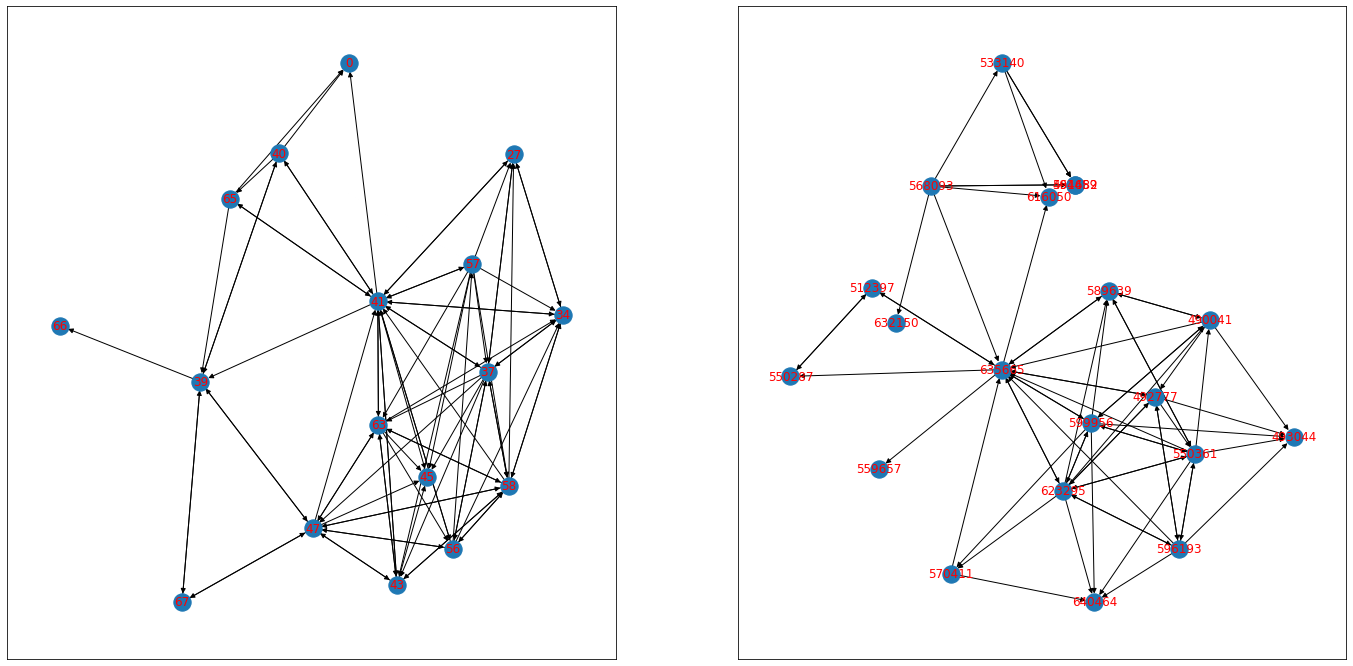

In [22]:
plot_diff(GT, G1, template_0_undir5, G1_0_undir5)

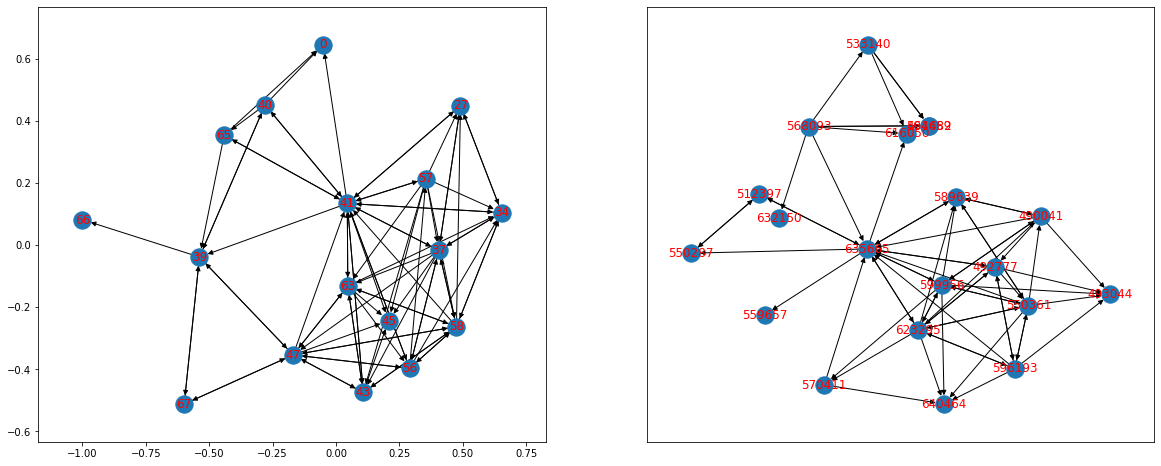

In [154]:
plot_diff(GT, G1, template_0_dir4, G1_0_dir4)

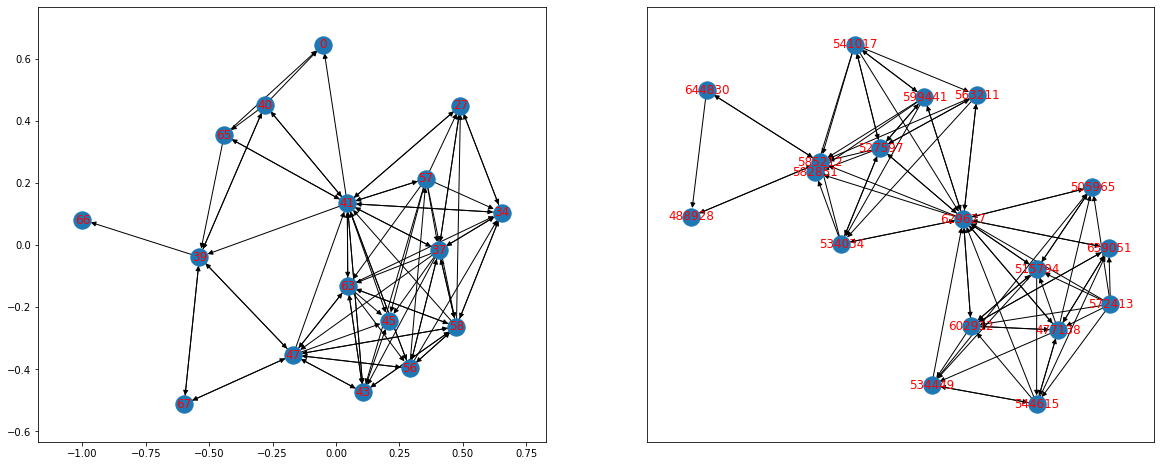

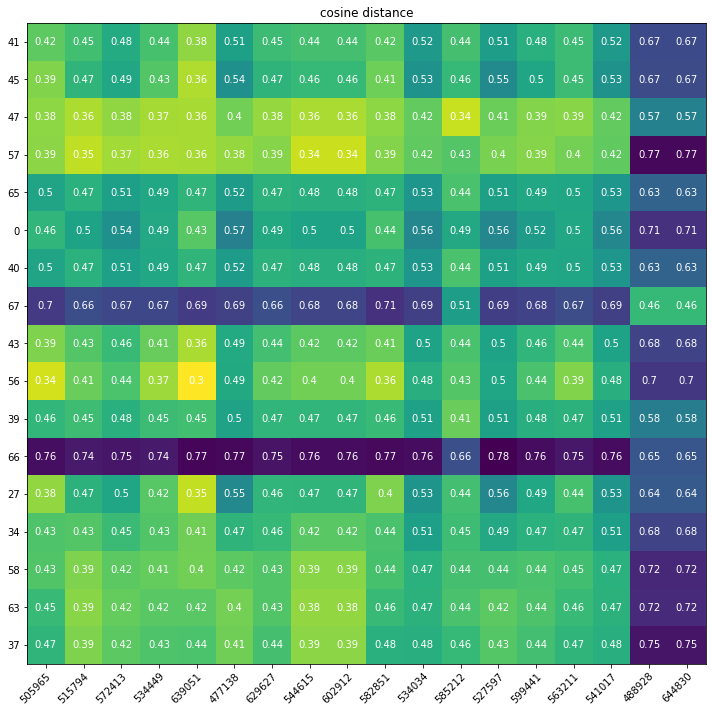

In [155]:
plot_diff(GT, G2, template_0_undir5, G2_0_undir5)

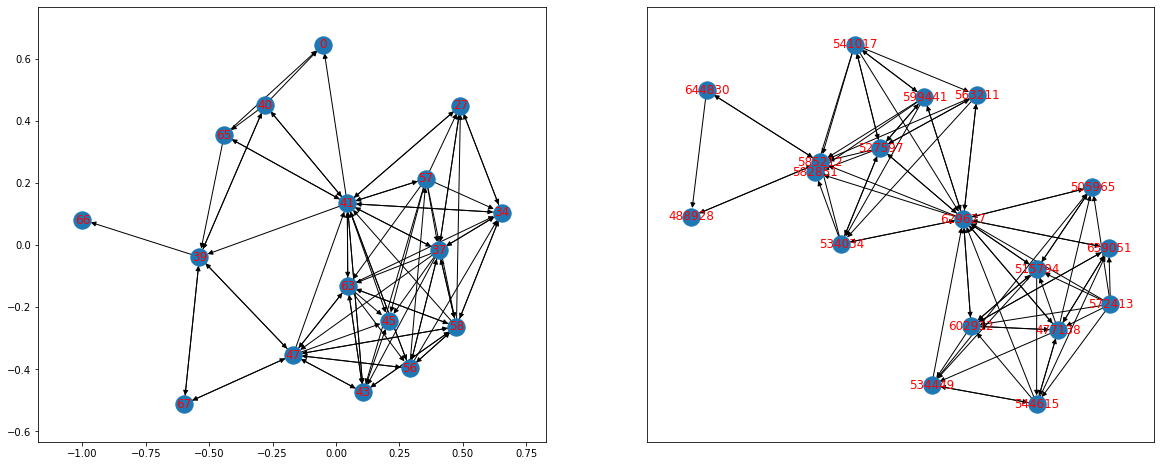

In [156]:
plot_diff(GT, G2, template_0_dir4, G2_0_dir4)

In [89]:
a = np.random.random((3,4))
b = np.random.random((3,4))

In [90]:
a

array([[0.5651063 , 0.58573757, 0.69758954, 0.78727144],
       [0.70259396, 0.70695713, 0.7337152 , 0.51014328],
       [0.79700432, 0.56786617, 0.04841623, 0.46560536]])

In [91]:
b

array([[0.36768211, 0.12553632, 0.65597325, 0.65961752],
       [0.96016154, 0.45294156, 0.39468625, 0.10840962],
       [0.90734856, 0.67693759, 0.0426098 , 0.87505015]])

In [92]:
a + b

array([[0.93278841, 0.71127389, 1.35356279, 1.44688896],
       [1.6627555 , 1.15989869, 1.12840145, 0.6185529 ],
       [1.70435287, 1.24480375, 0.09102603, 1.34065551]])

In [93]:
a / 2

array([[0.28255315, 0.29286879, 0.34879477, 0.39363572],
       [0.35129698, 0.35347857, 0.3668576 , 0.25507164],
       [0.39850216, 0.28393308, 0.02420812, 0.23280268]])